# Optical Interconnection Network - DNN (cleaned version)

*This version of the project removes all outliers present in the original dataset.

## 1. Import Libraries

In [1]:
# General libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data preprocessing and feature engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Data Preprocessing and Visualization

### 2.1. Load dataframe (df)

In [2]:
# Load dataframe (df) into appropriate format
df = pd.read_csv('optical_interconnection_network.csv', sep=';', decimal=',')
# Remove unnamed columsn identified by (;)
df = df.loc[:, ~df.columns.str.match('^Unnamed')]

### 2.2. Analyze dataframe

In [3]:
df

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
0,64,4,UN,Client-Server,0.1,0.839546,1.974686,308.491814,700.514102,0.352431
1,64,4,UN,Client-Server,0.2,0.827412,9.556437,291.037663,864.599227,0.506302
2,64,4,UN,Client-Server,0.3,0.802605,27.027618,264.928002,839.372851,0.638516
3,64,4,UN,Client-Server,0.4,0.723403,61.848511,235.776888,1256.053108,0.767051
4,64,4,UN,Client-Server,0.5,0.721210,121.085884,189.680044,1343.875577,0.807812
...,...,...,...,...,...,...,...,...,...,...
635,16,10,PS,Asynchronous,0.6,0.792340,532.737732,363.094043,1214.057768,0.961042
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
637,16,10,PS,Asynchronous,0.8,0.618230,905.326843,206.922631,1421.304936,0.962500
638,16,10,PS,Asynchronous,0.9,0.564482,1048.269897,154.713952,2371.043062,0.979375


#### Spatial Distribution:

- UN: Uniform
- HR: Hot Region
- BR: Bit Reverse
- PS: Perfect Shuffle

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Node Number             640 non-null    int64  
 1   Thread Number           640 non-null    int64  
 2   Spatial Distribution    640 non-null    object 
 3   Temporal Distribution   640 non-null    object 
 4   T/R                     640 non-null    float64
 5   Processor Utilization   640 non-null    float64
 6   Channel Waiting Time    640 non-null    float64
 7   Input Waiting Time      640 non-null    float64
 8   Network Response Time   640 non-null    float64
 9   Channel Utilization     640 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 50.1+ KB


In [5]:
# Check for missing values
df.isnull().sum()

Node Number               0
Thread Number             0
Spatial Distribution      0
Temporal Distribution     0
T/R                       0
Processor Utilization     0
Channel Waiting Time      0
Input Waiting Time        0
Network Response Time     0
Channel Utilization       0
dtype: int64

In [6]:
df.describe()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,40.000000,7.000000,0.550000,0.649013,377.459157,333.247102,1504.247529,26.347886
std,24.018772,2.237817,0.287453,0.194737,381.974899,233.721860,1202.606968,223.782214
min,16.000000,4.000000,0.100000,0.202377,0.950721,33.036130,0.529210,0.136979
25%,16.000000,5.500000,0.300000,0.492530,29.247560,137.730986,580.676198,0.587539
50%,40.000000,7.000000,0.550000,0.624787,265.614624,261.855556,1232.150369,0.773611
75%,64.000000,8.500000,0.800000,0.833106,664.965408,485.943680,2115.326618,0.905573
max,64.000000,10.000000,1.000000,0.986516,1627.330246,892.852416,6065.736672,2895.323131


### 2.3. Clean data

In [7]:
# Sort dataframe according to Channel Utilization
df_sorted = df.sort_values(by=['Channel Utilization'])

In [8]:
df_sorted.tail(15)

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
159,64,10,PS,Client-Server,1.0,0.509802,1211.382568,147.265376,5919.152636,0.980382
639,16,10,PS,Asynchronous,1.0,0.515257,1184.647461,136.375081,2592.966463,0.980903
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
477,16,10,PS,Client-Server,0.8,0.635748,928.996765,176.748269,2980.861045,0.982778
478,16,10,PS,Client-Server,0.9,0.574563,1072.681763,152.513064,3372.189353,0.990312
120,64,4,PS,Client-Server,0.1,0.828573,1.934532,281.991851,0.529210,607.869882
121,64,4,PS,Client-Server,0.2,0.824084,9.550200,262.127869,0.633802,902.966929
122,64,4,PS,Client-Server,0.3,0.795685,26.339130,239.734762,0.718047,1042.409722
124,64,4,PS,Client-Server,0.5,0.695053,126.209816,176.588953,0.822266,1202.936709
123,64,4,PS,Client-Server,0.4,0.739597,56.360073,230.163026,0.778299,1219.612435


In [9]:
# Remove last 10 rows of sorted dataframe
# These are outliers in which the Channel Utilization is over 100%
# (does not make sense)
df_sorted.drop(df_sorted.tail(10).index, inplace=True)

In [10]:
df_sorted

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
560,16,4,BR,Asynchronous,0.1,0.442501,1.013195,381.615554,19.110126,0.136979
240,64,4,BR,Asynchronous,0.1,0.590286,1.474199,313.118038,26.502746,0.137726
570,16,6,BR,Asynchronous,0.1,0.487785,1.119696,498.820922,19.484081,0.149965
250,64,6,BR,Asynchronous,0.1,0.648118,1.745482,501.624530,21.445301,0.151797
580,16,8,BR,Asynchronous,0.1,0.508909,1.348418,652.238802,18.983249,0.153542
...,...,...,...,...,...,...,...,...,...,...
159,64,10,PS,Client-Server,1.0,0.509802,1211.382568,147.265376,5919.152636,0.980382
639,16,10,PS,Asynchronous,1.0,0.515257,1184.647461,136.375081,2592.966463,0.980903
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
477,16,10,PS,Client-Server,0.8,0.635748,928.996765,176.748269,2980.861045,0.982778


In [11]:
df_sorted.describe()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,39.619048,7.047619,0.550000,0.649192,380.302534,335.783999,1528.112170,0.721877
std,24.016044,2.223080,0.287456,0.195312,383.702712,234.523491,1196.975056,0.203917
min,16.000000,4.000000,0.100000,0.202377,0.950721,33.036130,18.983249,0.136979
25%,16.000000,6.000000,0.300000,0.492629,29.551503,137.952154,610.232346,0.585052
50%,16.000000,8.000000,0.550000,0.624115,269.269196,264.890081,1263.970861,0.769844
75%,64.000000,10.000000,0.800000,0.835392,668.430801,495.312932,2125.945976,0.901231
max,64.000000,10.000000,1.000000,0.986516,1627.330246,892.852416,6065.736672,0.990312


In [12]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df_sorted.iloc[:, :-1].values, df_sorted.iloc[:, -1].values

print(X.shape, y.shape)

(630, 9) (630,)


### 2.4. Visualize data

#### Pairwise relationships between features

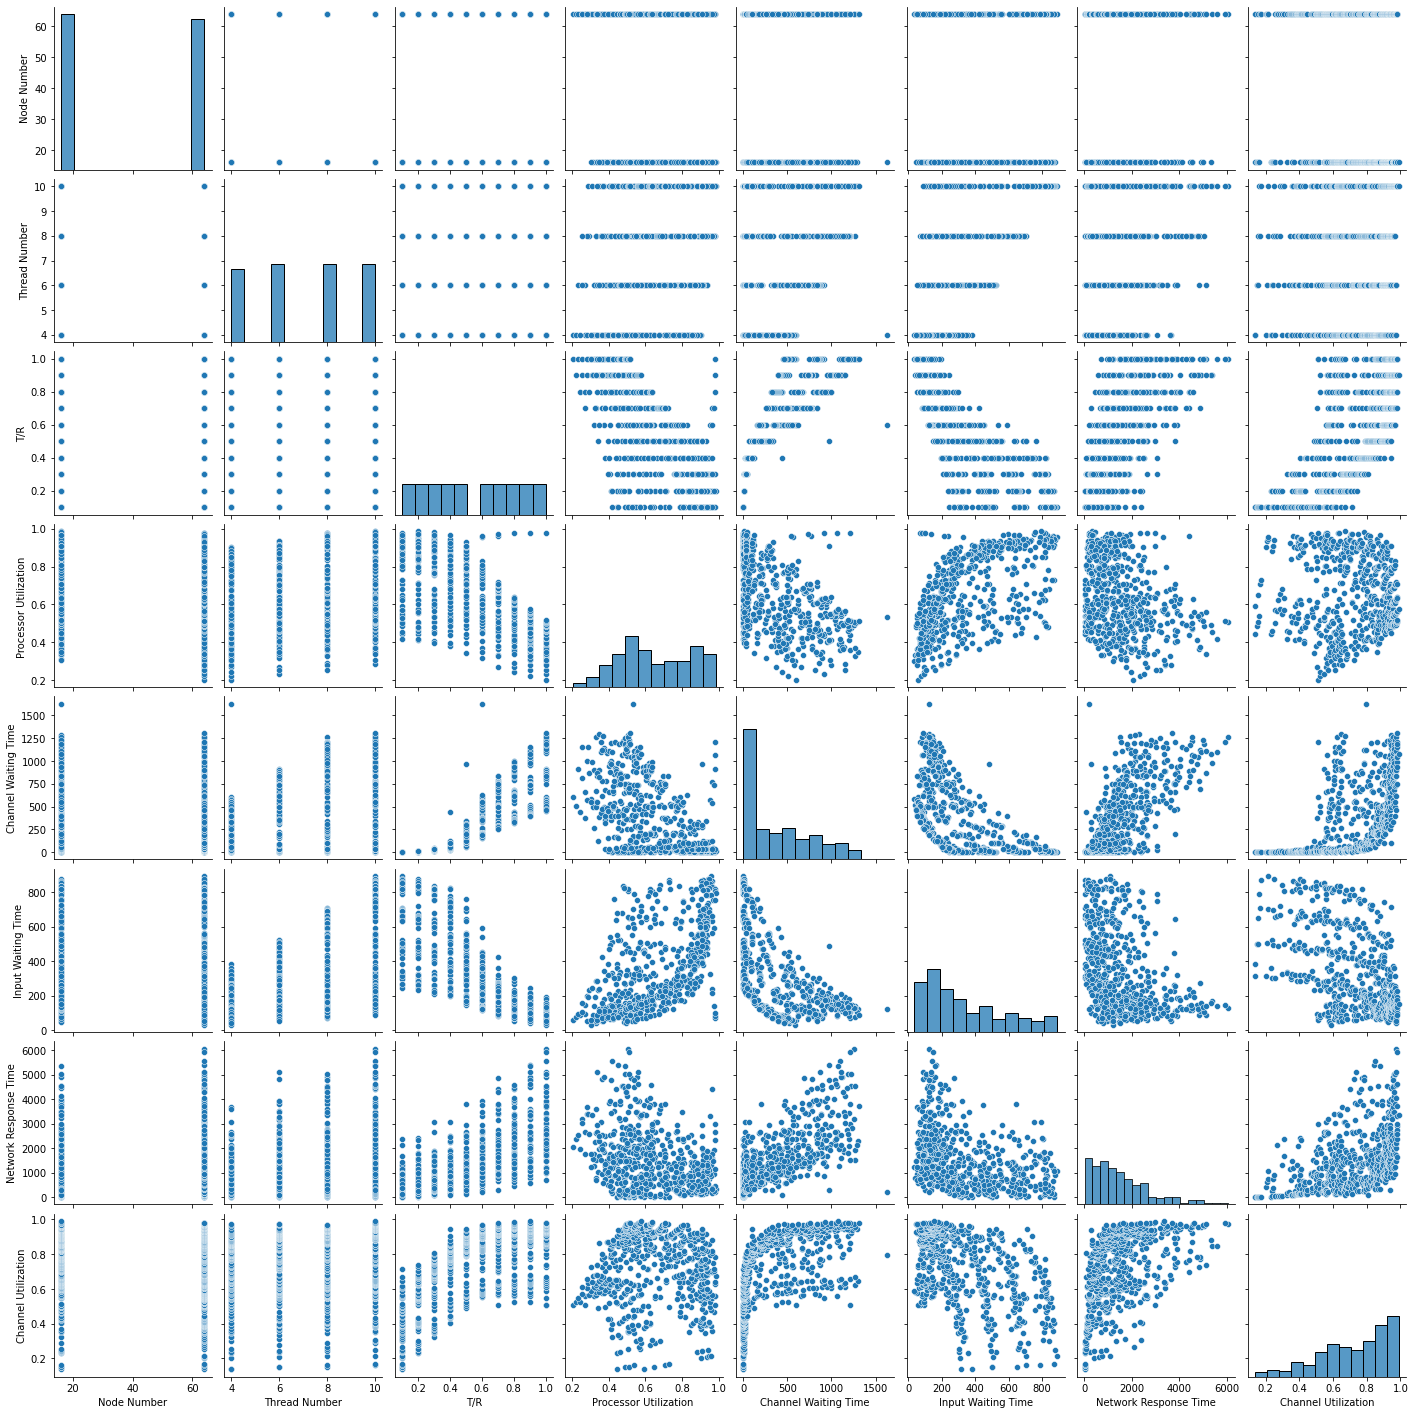

In [13]:
# Pairwise distributions
sns.pairplot(df_sorted)
plt.show()

#### Channel Utilization per Spatial Distribution

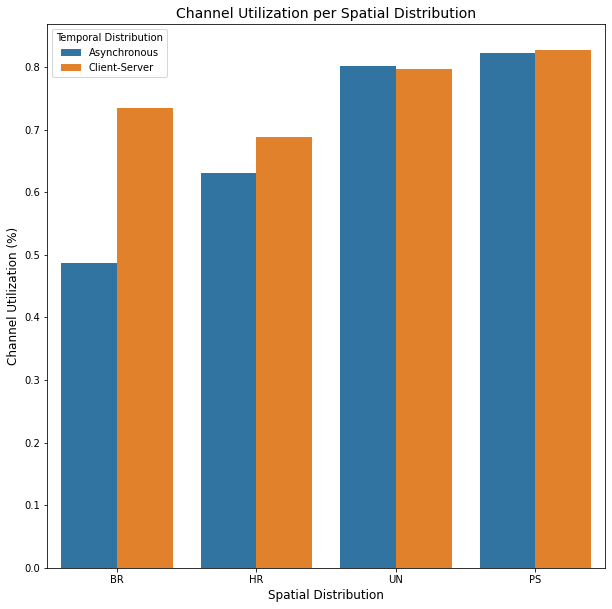

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Utilization'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization (%)', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
plt.show()

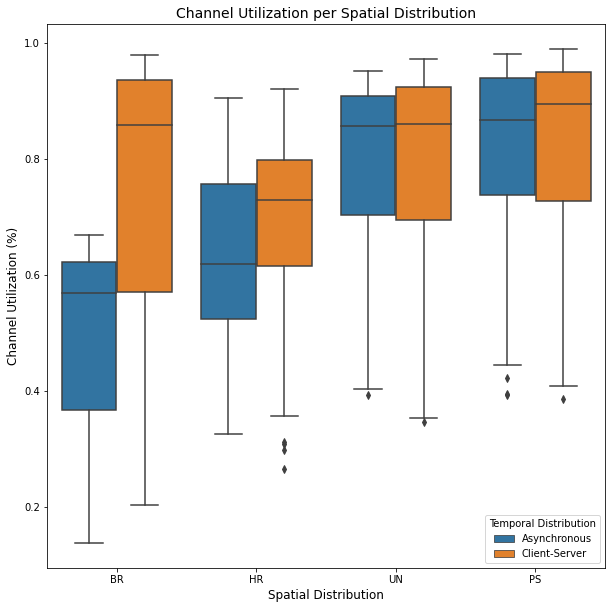

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Utilization'], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization (%)', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
plt.show()

#### Channel Waiting Time per Spatial Distribution

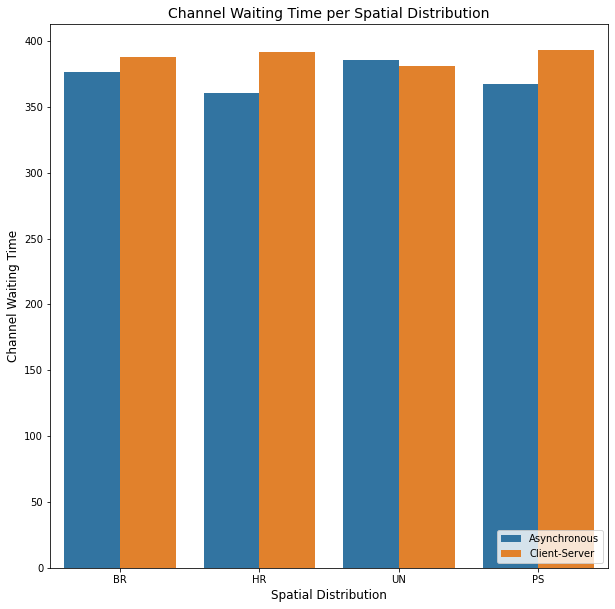

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Waiting Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)
plt.legend(loc='lower right')
plt.show()

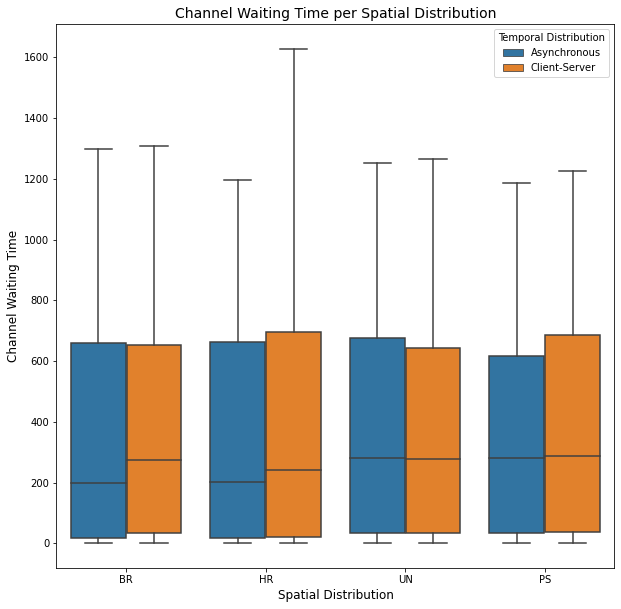

In [17]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Waiting Time'], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)
plt.show()

#### Processor Utilization per Spatial Distribution

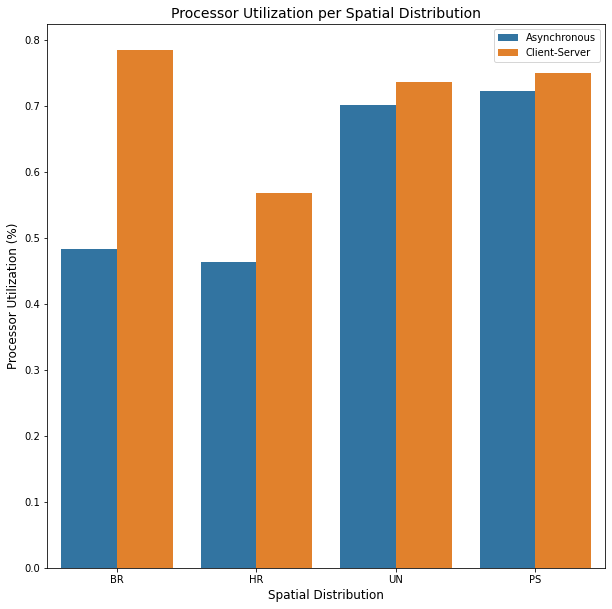

In [18]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Processor Utilization '], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization (%)', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
plt.legend(loc='upper right')
plt.show()

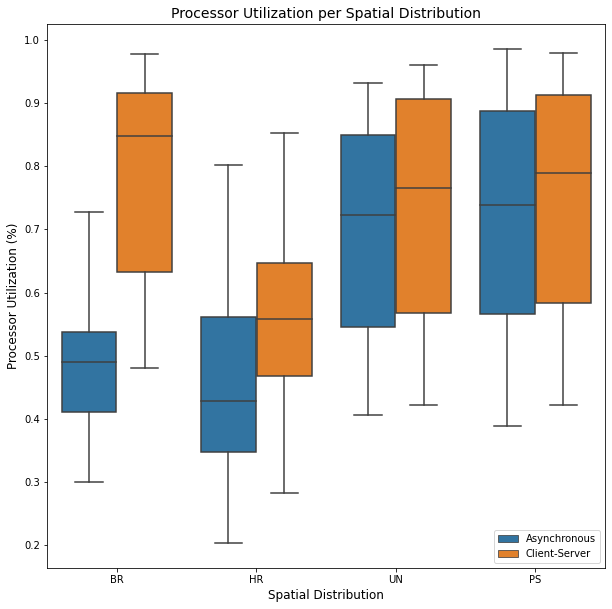

In [19]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Processor Utilization '], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization (%)', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
plt.legend(loc='lower right')
plt.show()

#### Network Response Time per Spatial Distribution

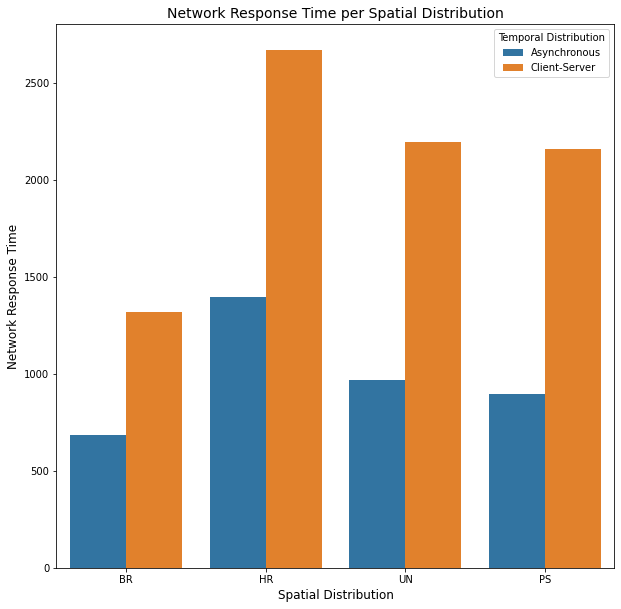

In [20]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Network Response Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)
plt.show()

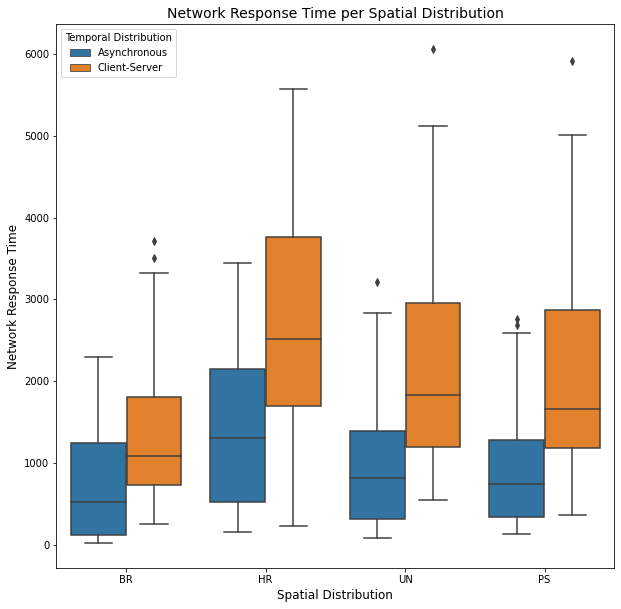

In [21]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Network Response Time'], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)
plt.show()

#### Input Waiting Time per Spatial Distribution

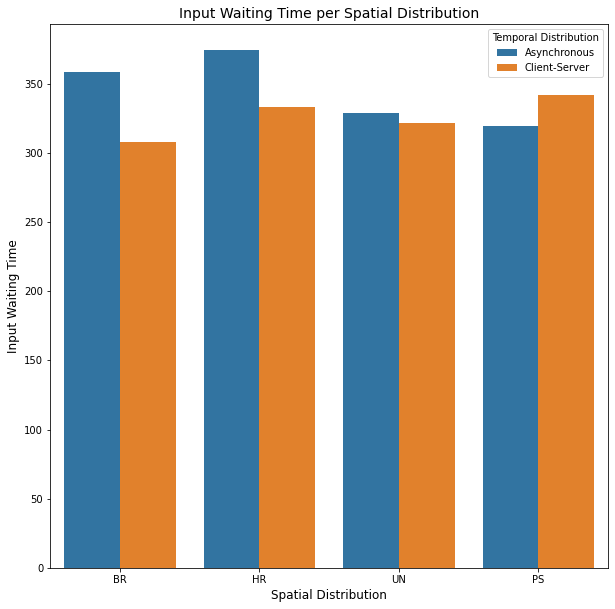

In [22]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Input Waiting Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Input Waiting Time', fontsize=12)
plt.title('Input Waiting Time per Spatial Distribution', fontsize=14)
plt.show()

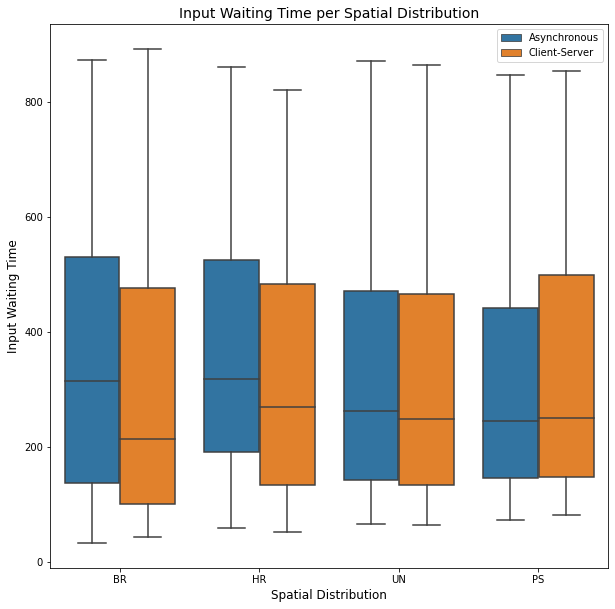

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Input Waiting Time'], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Input Waiting Time', fontsize=12)
plt.title('Input Waiting Time per Spatial Distribution', fontsize=14)
plt.legend(loc='upper right')
plt.show()

#### Correlation Map

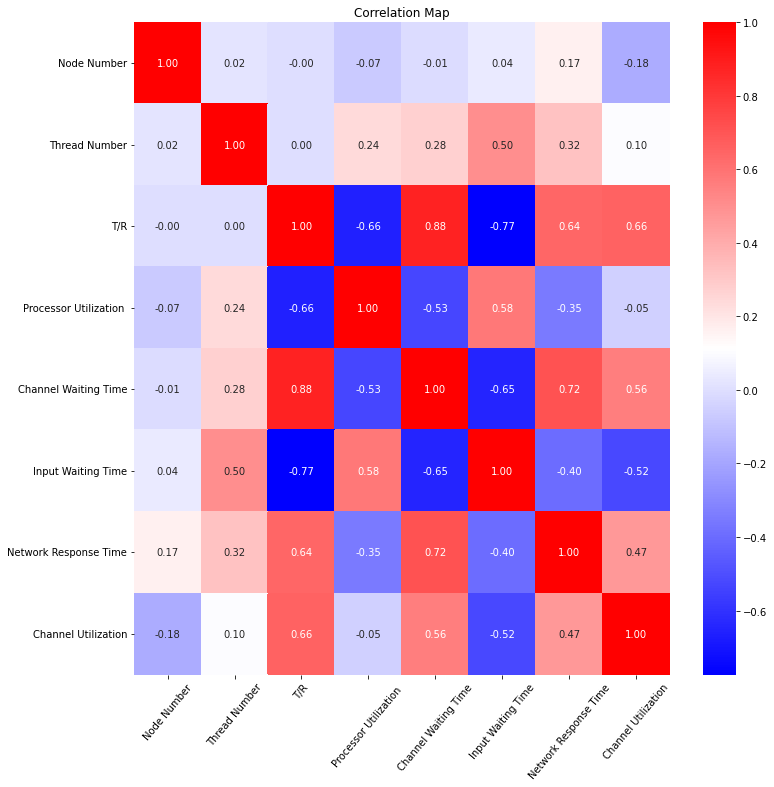

In [24]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df_sorted.corr(), cmap='bwr', annot=True, fmt = ".2f")
plt.xticks(rotation=50)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

### 2.5. Feature Engineering

In [25]:
# Label Encode the Spatial Distribution column
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
# X[:, 3] = le.fit_transform(X[:, 3])

In [26]:
# One-Hot Encode the Temporal Distribution column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
X[:5, :]

array([[1.0, 0.0, 16, 4, 0, 0.1, 0.44250100000000003, 1.013195,
        381.61555400000003, 19.110126],
       [1.0, 0.0, 64, 4, 0, 0.1, 0.590286, 1.474199, 313.118038,
        26.502746000000002],
       [1.0, 0.0, 16, 6, 0, 0.1, 0.487785, 1.1196959999999998,
        498.820922, 19.484081],
       [1.0, 0.0, 64, 6, 0, 0.1, 0.6481180000000001, 1.745482, 501.62453,
        21.445301],
       [1.0, 0.0, 16, 8, 0, 0.1, 0.5089090000000001, 1.3484180000000001,
        652.238802, 18.983249]], dtype=object)

In [28]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [29]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3. Define DNN Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                880       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4860      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 12,281
Trainable params: 12,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 0.2011 - val_loss: 0.0798
Epoch 2/100
16/16 

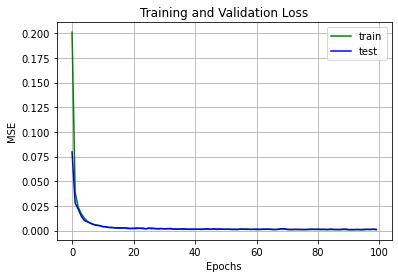

In [31]:
# Define model
reg = Sequential()

# Add layers
reg.add(Dense(units=80, activation='relu', input_dim=X.shape[1]))
reg.add(Dense(units=80, activation='relu'))
reg.add(Dense(units=60, activation='relu'))
reg.add(Dropout(0.02))

reg.add(Dense(units=1))

# Compile model
reg.compile(optimizer='adam', loss='mse')

# Summarize model
reg.summary()

# Train model
history = reg.fit(X_train, y_train, batch_size=32, epochs=100, 
                  validation_data=(X_test, y_test))

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='train')
plt.plot(history.history['val_loss'], 'b', label='test')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

## 4. Evaluate DNN Model

In [32]:
# Predict test set results
y_pred = reg.predict(X_test)

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))

MAE: 0.027
MSE: 0.001
RMSE: 0.035
R^2 Score: 0.973


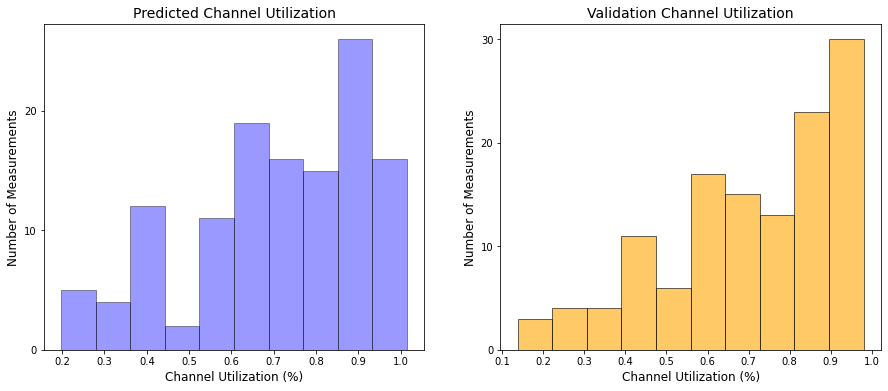

In [33]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 100, 10))
plt.hist(x=y_pred, facecolor='blue', alpha=0.4, edgecolor='black')
plt.xlabel('Channel Utilization (%)', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Predicted Channel Utilization', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 100, 10))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Channel Utilization (%)', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Validation Channel Utilization', fontsize=14)

# Show subplot
plt.show()

## 5. Sample Results

<table border = "1">
  <thead>
    <th colspan = "3">Sample Neural Network Regression Scores</th>
  </thead>
    <tr>
      <td><b>MAE</b></td>
      <td>0.027</td>
    </tr>
    <tr>
      <td><b>MSE</b></td>
      <td>0.001</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>0.035</td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>0.973</td>
    </tr>
  </tbody>
</table>

Note: These results will vary due to the random nature of Deep Learning.

## 6. Remarks

*   The original dataset of 640 samples contained 10 outliers indicating the Channel Utilization (dependent variable) was over 100%. Such information makes no sense given that percentages are values between 0 and 100.
*   Removing those 10 outliers ensures that the results obtained are more consistent. Given that the original dataset contained 640 samples, removing 10 of them does not significantly affect the remaining data present nor the ability of the Deep Learning model used to make accurate predictions.

